In [114]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


In [115]:
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import rcParams

rcParams['figure.figsize'] = 10, 8
sns.set_style('whitegrid')
rcParams['font.family'] = 'sans-serif'
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

In [116]:
# read data
data = pd.read_csv('dataset/Travel.csv')

In [117]:
data.head(3)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0


### **Handling Missing Values**

In [118]:
df_new = data.copy()

In [119]:
# drop missing value
df_new.dropna(subset=['TypeofContact','NumberOfChildrenVisiting','PreferredPropertyStar','NumberOfTrips'], inplace=True)

In [120]:
# imputasi missing value dengan mode, median & mean
df_new['Age'].fillna(df_new['Age'].mean(), inplace=True)
df_new['DurationOfPitch'].fillna(df_new['DurationOfPitch'].median(), inplace=True)
df_new['NumberOfFollowups'].fillna(df_new['NumberOfFollowups'].mode()[0], inplace=True)
df_new['MonthlyIncome'].fillna(df_new['MonthlyIncome'].median(), inplace=True)

In [121]:
# drop column CustomerID and Number of children visiting

data.drop(['CustomerID','NumberOfChildrenVisiting'], axis=1, inplace=True)

In [122]:
# lets transform float type data to int

df_new = df_new.astype({"Age":'int', "DurationOfPitch":'int','NumberOfFollowups':'int', 'PreferredPropertyStar':'int',
                        "NumberOfTrips":'int', "NumberOfChildrenVisiting":'int', "MonthlyIncome":'int'})

In [123]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4631 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CustomerID                4631 non-null   int64 
 1   ProdTaken                 4631 non-null   int64 
 2   Age                       4631 non-null   int64 
 3   TypeofContact             4631 non-null   object
 4   CityTier                  4631 non-null   int64 
 5   DurationOfPitch           4631 non-null   int64 
 6   Occupation                4631 non-null   object
 7   Gender                    4631 non-null   object
 8   NumberOfPersonVisiting    4631 non-null   int64 
 9   NumberOfFollowups         4631 non-null   int64 
 10  ProductPitched            4631 non-null   object
 11  PreferredPropertyStar     4631 non-null   int64 
 12  MaritalStatus             4631 non-null   object
 13  NumberOfTrips             4631 non-null   int64 
 14  Passport                

### **Handling Unmatched Data Value**

In [124]:
# replace Fe Male into Female in column Gender 

df_new['Gender'] = df_new['Gender'].replace(['Fe Male'],'Female')

In [125]:
df_new['Gender'].value_counts()

Male      2765
Female    1866
Name: Gender, dtype: int64

In [126]:
# replace Unmarried and Divorce into Single in column MaritalStatus

df_new['MaritalStatus'] = df_new['MaritalStatus'].replace(['Unmarried','Divorced'],'Single')

In [127]:
df_new['MaritalStatus'].value_counts()

Single     2427
Married    2204
Name: MaritalStatus, dtype: int64

In [128]:
# check duplicate data
df_new.duplicated().sum()

0

In [129]:
# check data value

categorical_df = pd.DataFrame()
for col in df_new.select_dtypes(include=['object','int64']):
    categorical_df[col] = df_new[col]
for col in categorical_df:
    print(f'{col :-<50} {df_new[col].unique()}')

CustomerID---------------------------------------- [200000 200001 200002 ... 204885 204886 204887]
ProdTaken----------------------------------------- [1 0]
Age----------------------------------------------- [41 49 37 33 32 59 30 38 36 35 31 34 28 29 22 53 21 42 44 46 39 24 43 50
 27 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60 61]
TypeofContact------------------------------------- ['Self Enquiry' 'Company Invited']
CityTier------------------------------------------ [3 1 2]
DurationOfPitch----------------------------------- [  6  14   8   9  30  29  33  22  21  32  25  27  11  17  15  13  12  16
  10  31  18  24  35  28  20  26  34  23   5  19 126   7  36 127]
Occupation---------------------------------------- ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Gender-------------------------------------------- ['Female' 'Male']
NumberOfPersonVisiting---------------------------- [3 2 1 4 5]
NumberOfFollowups--------------------------------- [3 4 2 5 1 6]
ProductPitched

### **Handing Outliers**
Not implemented, because we will use a non-linear model, which the model is robust with outlier.

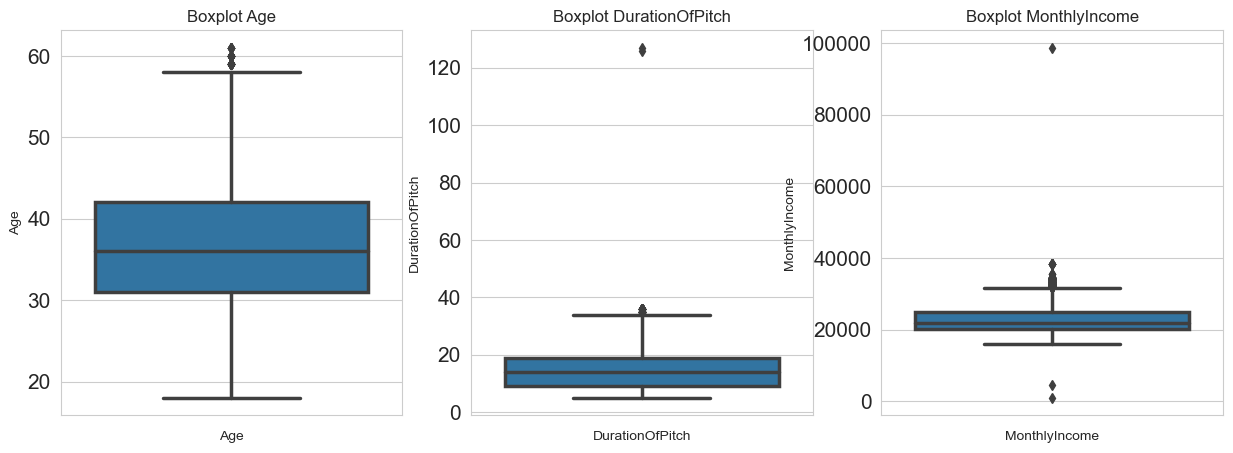

In [130]:
# check the distribution of data using boxplot in range i

i = ['Age', 'DurationOfPitch','MonthlyIncome']

fig, ax = plt.subplots(1,3, figsize=(15,5))
for col in i:
    sns.boxplot(y=df_new[col], ax=ax[i.index(col)])
    ax[i.index(col)].set_title(f'Boxplot {col}')
    ax[i.index(col)].set_xlabel(col)
plt.show()


In [131]:
# count column before outlier detection

# print(f'Number of rows before filtering Zscore:{len(df_new)}')

# outlier detection

# i = ['Age', 'DurationOfPitch','MonthlyIncome']

#outlier detection using Quantile

# Q1 = df[i].quantile(0.25)
# Q3 = df[i].quantile(0.75)
# IQR = Q3 - Q1

# lower_limit = Q1 - (1.5*IQR)
# upper_limit = Q3 + (1.5*IQR)

# df_new = df[~((df[i] < lower_limit) | (df[i] > upper_limit)).any(axis=1)]

# outlier detection using Z-Score

# z = np.abs(stats.zscore(df_new[i]))
# df_new = df_new[(z < 3).all(axis=1)]


# print(f'Number of rows after filtering outliers using Zscore:{len(df_new)}')


### **Future Transformation**

In [132]:
# lets rescale data using MinMaxScaler on column DurationOfPitch, MonthlyIncome ( because the data is not normally distributed)

df_new[['DurationOfPitch','MonthlyIncome']] = MinMaxScaler().fit_transform(df_new[['DurationOfPitch','MonthlyIncome']])

# lets rescale data using StandardScaler on column Age ( because the data is normally distributed)

df_new['Age'] = StandardScaler().fit_transform(df_new[['Age']])

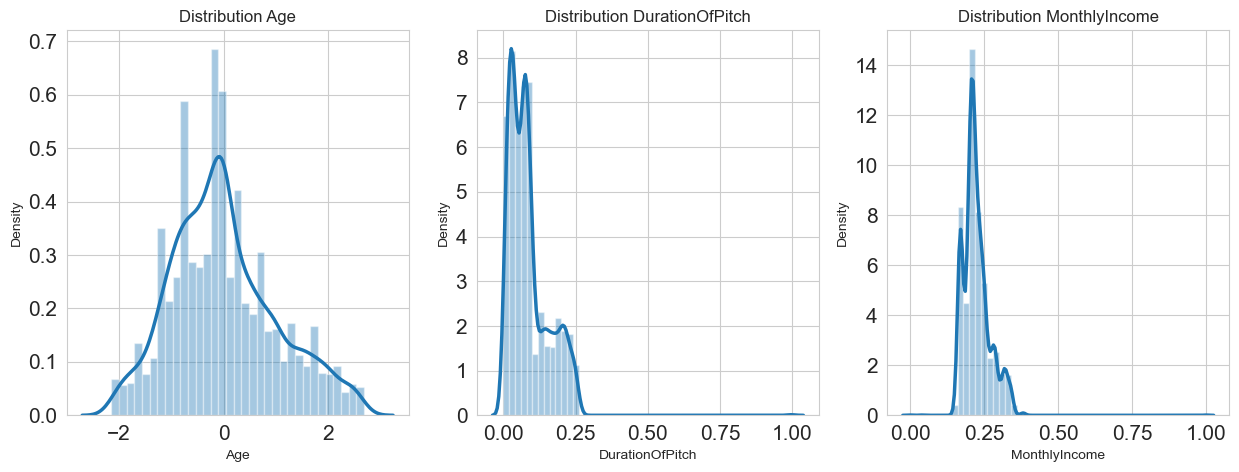

In [133]:
# show data distribution after rescaling

i = ['Age', 'DurationOfPitch','MonthlyIncome']

# use distplot to check distribution of data

fig, ax = plt.subplots(1,3, figsize=(15,5))
for col in i:
        sns.distplot(df_new[col], ax=ax[i.index(col)])
        ax[i.index(col)].set_title(f'Distribution {col}')
        ax[i.index(col)].set_xlabel(col)

In [134]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4631.0,2.023993e+05,1409.468669,200000.000000,201182.000000,202361.000000,203626.500000,204887.000000
ProdTaken,4631.0,1.926150e-01,0.394396,0.000000,0.000000,0.000000,0.000000,1.000000
Age,4631.0,1.265962e-16,1.000108,-2.145879,-0.685678,-0.124062,0.549876,2.684016
CityTier,4631.0,1.659253e+00,0.919468,1.000000,1.000000,1.000000,3.000000,3.000000
DurationOfPitch,4631.0,8.593725e-02,0.068375,0.000000,0.032787,0.073770,0.114754,1.000000
NumberOfPersonVisiting,4631.0,2.888577e+00,0.725426,1.000000,2.000000,3.000000,3.000000,5.000000
NumberOfFollowups,4631.0,3.692939e+00,1.000363,1.000000,3.000000,4.000000,4.000000,6.000000
PreferredPropertyStar,4631.0,3.579572e+00,0.796378,3.000000,3.000000,3.000000,4.000000,5.000000
NumberOfTrips,4631.0,3.220255e+00,1.847849,1.000000,2.000000,3.000000,4.000000,22.000000
Passport,4631.0,2.934571e-01,0.455395,0.000000,0.000000,0.000000,1.000000,1.000000


### **Feature Encoding**

In [135]:
# onehots encoder pada Occupation dan TypeofContact
for cat in ['Occupation','TypeofContact','Designation']:
  onehots = pd.get_dummies(df_new[cat], prefix=cat)
  df_new = df_new.join(onehots)


In [136]:
# label encoder pada Gender
df_new['Gender'] = df_new['Gender'].astype('category').cat.codes
df_new['MaritalStatus'] = df_new['MaritalStatus'].astype('category').cat.codes


In [137]:
def product(x):
    if x['ProductPitched'] == 'Basic':
        product = 0
    if x['ProductPitched'] == 'Standard':
        product = 1
    if x['ProductPitched'] == 'Deluxe':
        product = 2
    if x['ProductPitched'] == 'Super Deluxe':
        product = 3
    if x['ProductPitched'] == 'King':
        product = 4
    return product

df_new['ProductPitched'] = df_new.apply(lambda x: product(x), axis=1)

In [138]:
#show all column in table

pd.set_option('display.max_columns', None)


In [139]:
df_new.sample(3)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
971,200971,0,1.560785,Self Enquiry,1,0.098361,Large Business,0,2,4,3,4,1,4,0,1,0,1,AVP,0.277872,0,1,0,0,0,1,1,0,0,0,0
3776,203776,1,-0.798001,Company Invited,1,0.213115,Salaried,1,4,5,0,3,1,3,1,3,1,3,Executive,0.205952,0,0,1,0,1,0,0,1,0,0,0
1829,201829,0,-0.124062,Company Invited,3,0.032787,Small Business,1,2,4,1,3,0,5,0,1,0,0,Senior Manager,0.242624,0,0,0,1,1,0,0,0,0,1,0


In [140]:
# droping unnecessary column

df_new = df_new.drop(columns=['TypeofContact','Occupation','Designation']).copy()

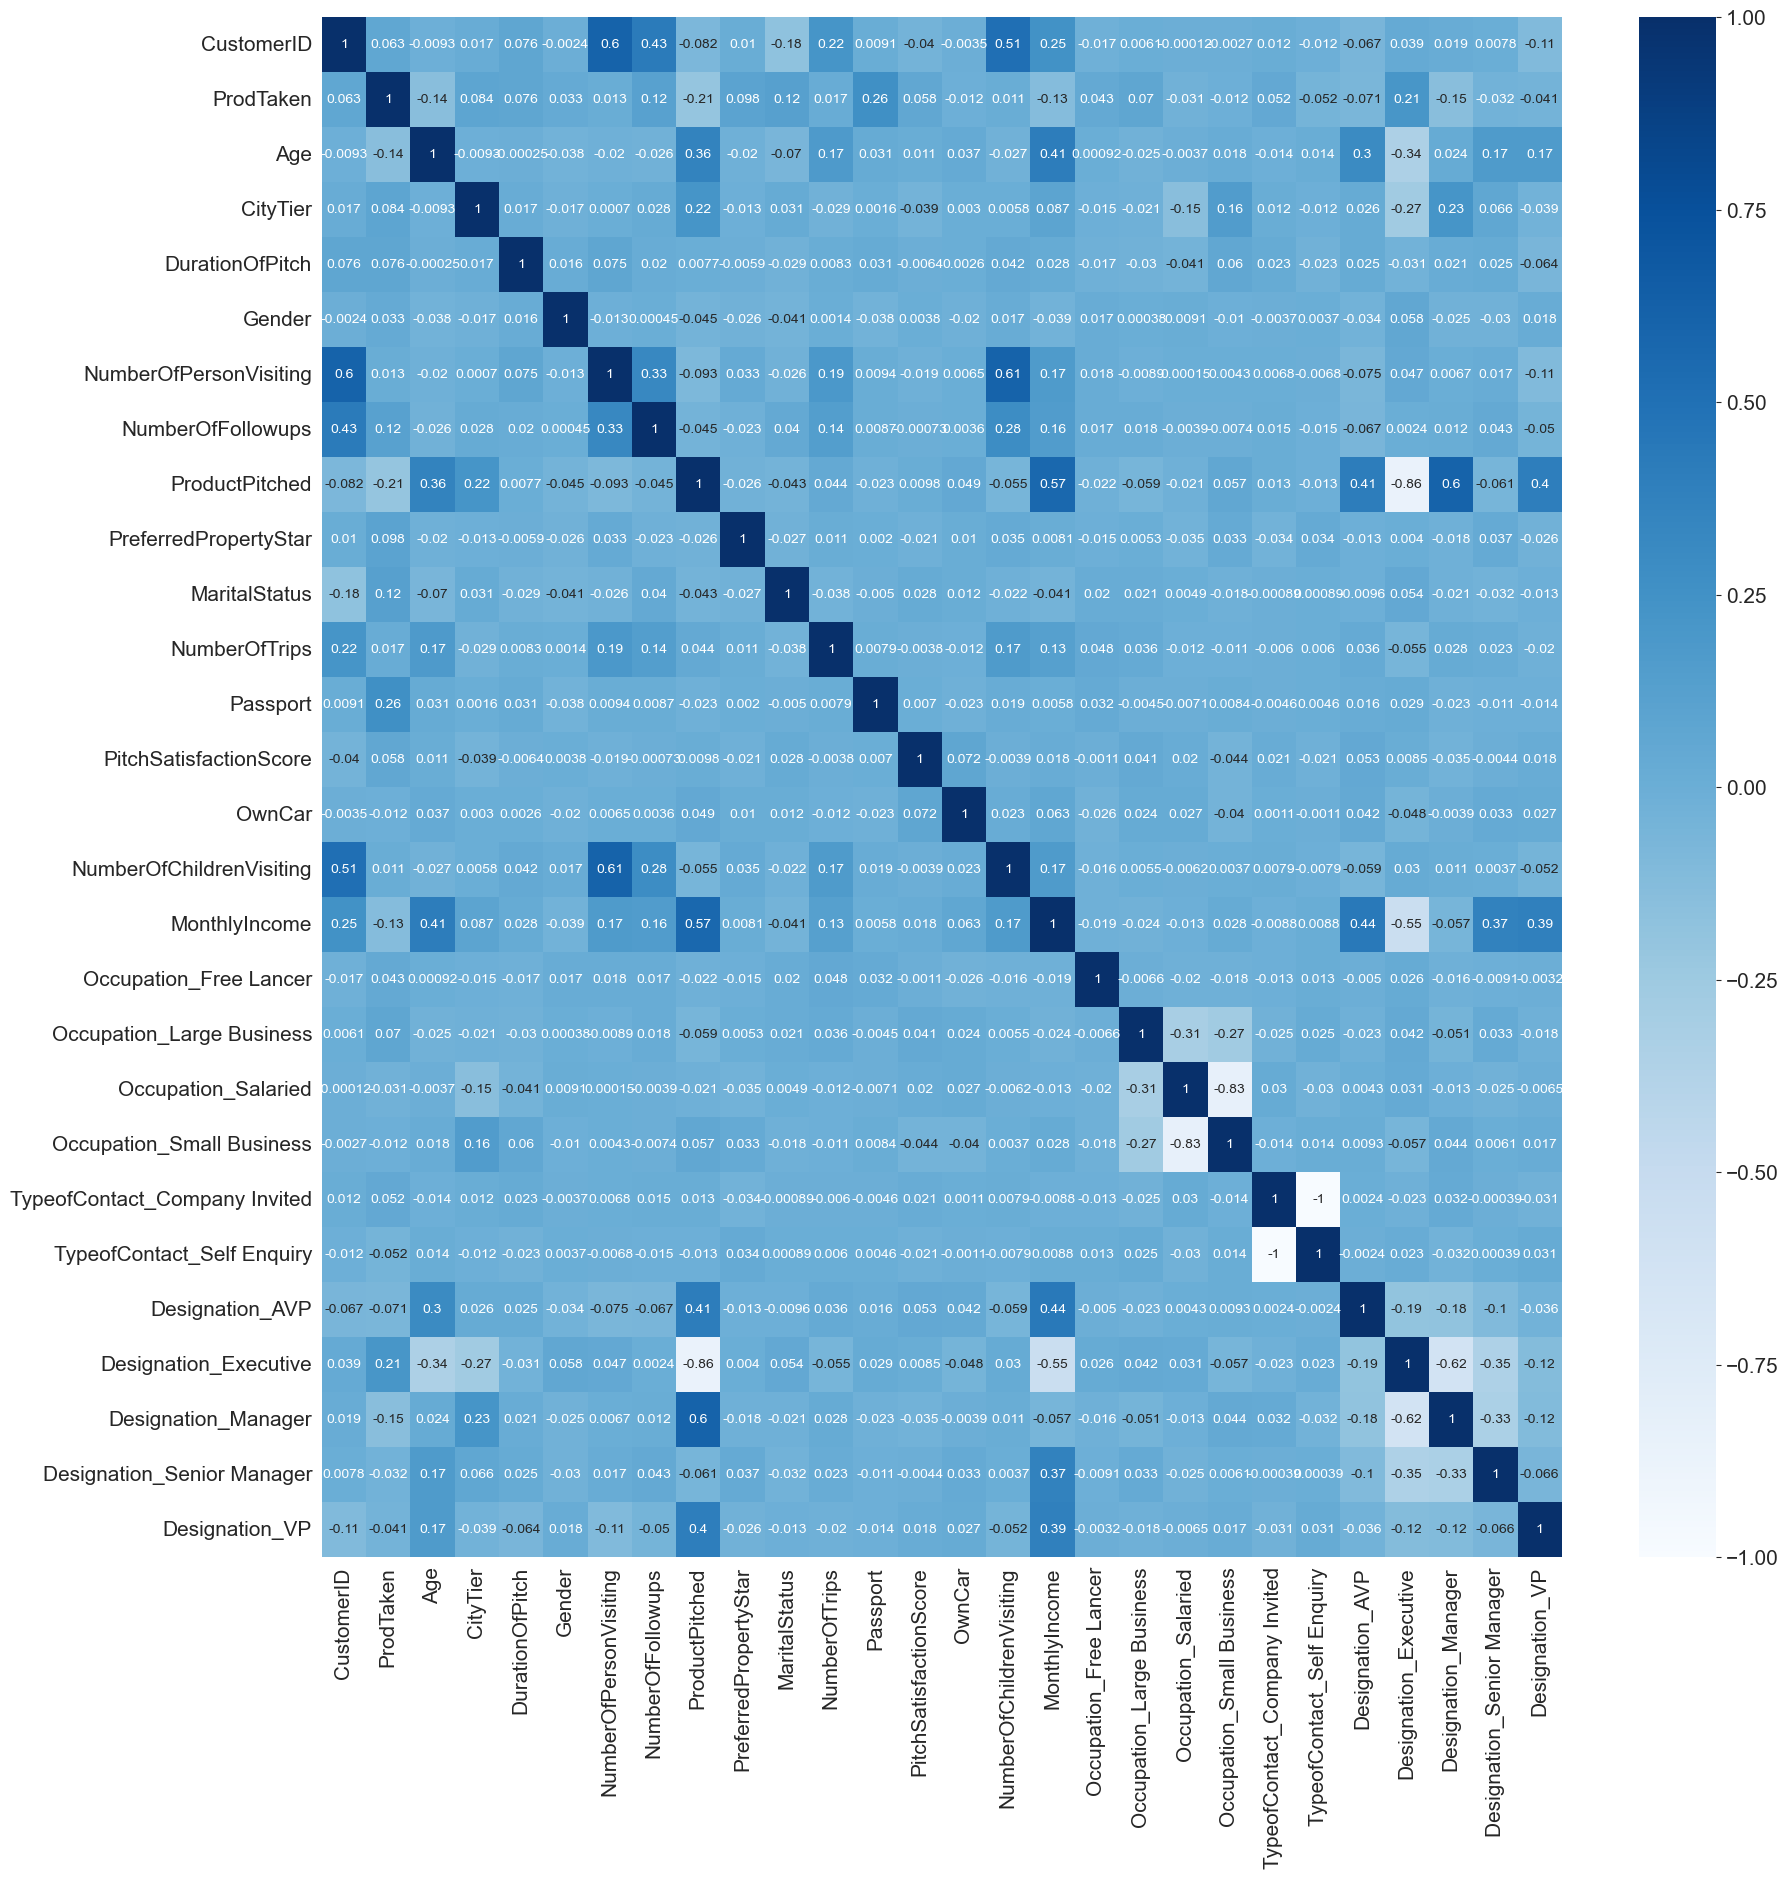

In [141]:
# show correlation between data

plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(), annot=True, cmap='Blues')
plt.show()


In [142]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4631 entries, 0 to 4887
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     4631 non-null   int64  
 1   ProdTaken                      4631 non-null   int64  
 2   Age                            4631 non-null   float64
 3   CityTier                       4631 non-null   int64  
 4   DurationOfPitch                4631 non-null   float64
 5   Gender                         4631 non-null   int8   
 6   NumberOfPersonVisiting         4631 non-null   int64  
 7   NumberOfFollowups              4631 non-null   int64  
 8   ProductPitched                 4631 non-null   int64  
 9   PreferredPropertyStar          4631 non-null   int64  
 10  MaritalStatus                  4631 non-null   int8   
 11  NumberOfTrips                  4631 non-null   int64  
 12  Passport                       4631 non-null   i

In [143]:
df_new.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome', 'Occupation_Free Lancer',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'TypeofContact_Company Invited',
       'TypeofContact_Self Enquiry', 'Designation_AVP',
       'Designation_Executive', 'Designation_Manager',
       'Designation_Senior Manager', 'Designation_VP'],
      dtype='object')

In [144]:
df_droped = df_new.drop(columns=['CustomerID',
       'Gender', 'NumberOfPersonVisiting','MaritalStatus','OwnCar',
       'NumberOfChildrenVisiting','Occupation_Free Lancer',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'TypeofContact_Company Invited',
       'TypeofContact_Self Enquiry', 'Designation_AVP',
       'Designation_Executive', 'Designation_Manager',
       'Designation_Senior Manager', 'Designation_VP'])

<AxesSubplot:>

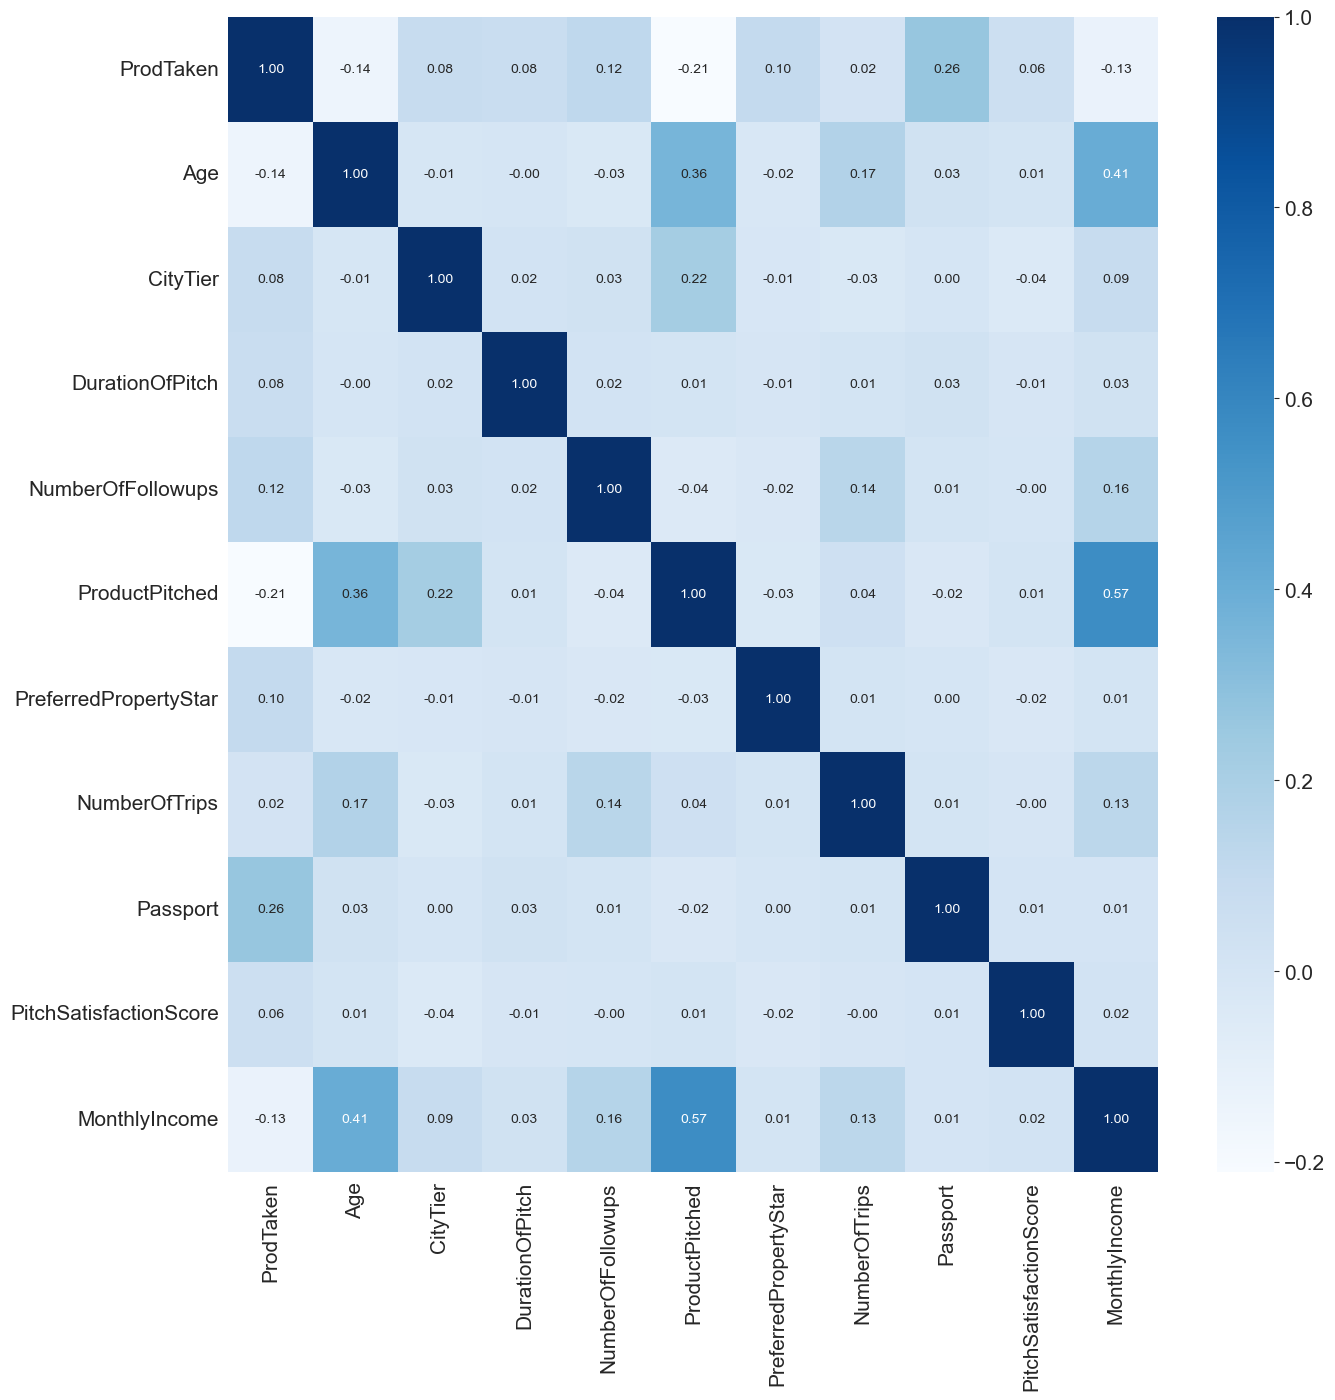

In [145]:
plt.figure(figsize=(15,15))
sns.heatmap(df_droped.corr(),cmap='Blues',annot=True,fmt='.2f')

In [146]:
df_droped.sample(5)

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,MonthlyIncome
91,0,1.560785,3,0.180328,3,2,3,1,1,5,0.199032
117,0,-0.124062,3,0.098361,3,1,3,1,0,5,0.243023
3275,1,-0.573355,1,0.139344,4,0,3,3,0,4,0.207703
1711,0,-0.573355,3,0.073770,3,2,3,1,0,4,0.214705
2993,0,-0.236385,1,0.081967,4,2,3,5,0,4,0.243862


In [147]:
#convert data to csv

new_data = pd.DataFrame(df_droped)
new_data.to_csv('new_data.csv',index=False)


## **Splitting Data**

In [148]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [149]:
# split to trainset and testset

trainset,testset = train_test_split(df_droped,test_size=0.3,random_state=42)

print(f'trainset column :',len(trainset))
print(f'testset column :',len(testset))


trainset column : 3241
testset column : 1390


In [150]:
# split to feature and target

x_train = trainset.drop(['ProdTaken'],axis=1)
y_train = trainset['ProdTaken']
x_test = testset.drop(['ProdTaken'],axis=1)
y_test = testset['ProdTaken']

## **Handling Class Imbalance**
 ***using SMOTE***


In [151]:
print('Number of data train before SMOTE : ', len(x_train),'column')
print(f'Number Target with value 0 : {sum(y_train == 0)}' )
print(f'Number Target with value 1 : {sum(y_train == 1)}\n' )

# oversampling using SMOTE
smote = SMOTE(sampling_strategy=1,random_state=42)
x_train,y_train = smote.fit_resample(x_train,y_train)

print('Number of data train after SMOTE : ', len(x_train),'column')
print(f'Number Target with value 0 : {sum(y_train == 0)}' )
print(f'Number Target with value 1 : {sum(y_train == 1)}' )

Number of data train before SMOTE :  3241 column
Number Target with value 0 : 2596
Number Target with value 1 : 645

Number of data train after SMOTE :  5192 column
Number Target with value 0 : 2596
Number Target with value 1 : 2596


In [152]:
print('Number of x_train column :',len(x_train))
print('Number of y_train column :',len(y_train))
print('Number of x_test column :',len(x_test))
print('Number of y_test column :',len(y_test))

Number of x_train column : 5192
Number of y_train column : 5192
Number of x_test column : 1390
Number of y_test column : 1390
